<a href="https://colab.research.google.com/github/Joe-hyper/DSW2C/blob/main/Copy_of_Python_Notebook_IP_Week_2_Core_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Defining the question**

### a) Specifying the question
      Predict which individuals are likely to be exposed to financial inclusion (own a bank account)


### b) Defining the metric for success
      Ability to predict the individuals likely to be banked in Kenya, Uganda, Rwanda and Tanzania. 

### c) Understanding the context
      Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

      Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

      The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

### d) Recording the experimental design
      1.Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question
      2.Find and deal with outliers, anomalies, and missing data within the dataset. Perform univariate, bivariate and multivariate analysis recording your observations.
      3.Implement the solution by performing the respective analysis i.e. factor analysis, principal component analysis, and discriminant analysis.
      4.Challenge your solution by providing insights on how you can make improvements.

### e) Data Relevance

# 2. **Importing Libraries**

In [ ]:
# importing all libraries needed. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# 3. **Reading the Data**

In [ ]:
# loading the dataset
# dataset url = http://bit.ly/FinancialDataset
FD_DF = pd.read_csv('http://bit.ly/FinancialDataset')

# 4. **Checking the Data**

In [ ]:
# lets check the info of the dataset
FD_DF.info

<bound method DataFrame.info of       country  year       uniqueid Has a Bank account Type of Location  \
0       Kenya  2018     uniqueid_1                Yes            Rural   
1       Kenya  2018     uniqueid_2                 No            Rural   
2       Kenya  2018     uniqueid_3                Yes            Urban   
3       Kenya  2018     uniqueid_4                 No            Rural   
4       Kenya  2018     uniqueid_5                 No            Urban   
...       ...   ...            ...                ...              ...   
23519  Uganda  2018  uniqueid_2113                 No            Rural   
23520  Uganda  2018  uniqueid_2114                 No            Rural   
23521  Uganda  2018  uniqueid_2115                 No            Rural   
23522  Uganda  2018  uniqueid_2116                 No            Urban   
23523  Uganda  2018  uniqueid_2117                 No            Rural   

      Cell Phone Access  household_size  Respondent Age gender_of_respondent  \

In [ ]:
# finding out the data types in our column
FD_DF.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [ ]:
# what is the # of records in our dataset
FD_DF.shape

(23524, 13)

In [ ]:
# preview of the top records of the dataset
FD_DF.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
FD_DF['household_size'].unique()

array([ 3.,  5.,  8.,  7.,  1.,  6.,  4., 10.,  2., 11.,  9., 12., 16.,
       15., 13., 14., 21., nan,  0., 18., 17., 20.])

In [ ]:
# a preview of the bottom records of our dataset
FD_DF.tail() 

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
# checking columns of the dataset
FD_DF.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [ ]:
# From checking the data, we can deem it appropriate to enable us perform an analysis.

# 5. **Tidying the Data**

In [ ]:
# In this section we will find any anomalies, missing, duplicate data within our dataset and any other pre-processing activities.

In [ ]:
# finding duplicate values in our dataset
FD_DF.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
23519    False
23520    False
23521    False
23522    False
23523    False
Length: 23524, dtype: bool

In [ ]:
# lets find unique values in our dataset
# finding unique values can help us identify columns with anomalies 
FD_DF.nunique()

country                      4
year                         6
uniqueid                  8735
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              21
Respondent Age              85
gender_of_respondent         2
The relathip with head       6
marital_status               5
Level of Educuation          7
Type of Job                 10
dtype: int64

In [ ]:
# finding missing data within our values
FD_DF.isnull().sum()


country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [ ]:
# dealing with missing data
clean_FD_DF = FD_DF.dropna()
clean_FD_DF.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [ ]:
# removing white spaces, lowering case of all columns to achieve uniformity; replacing spaces
clean_FD_DF.columns = FD_DF.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
# lets check the coolumns
clean_FD_DF.columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

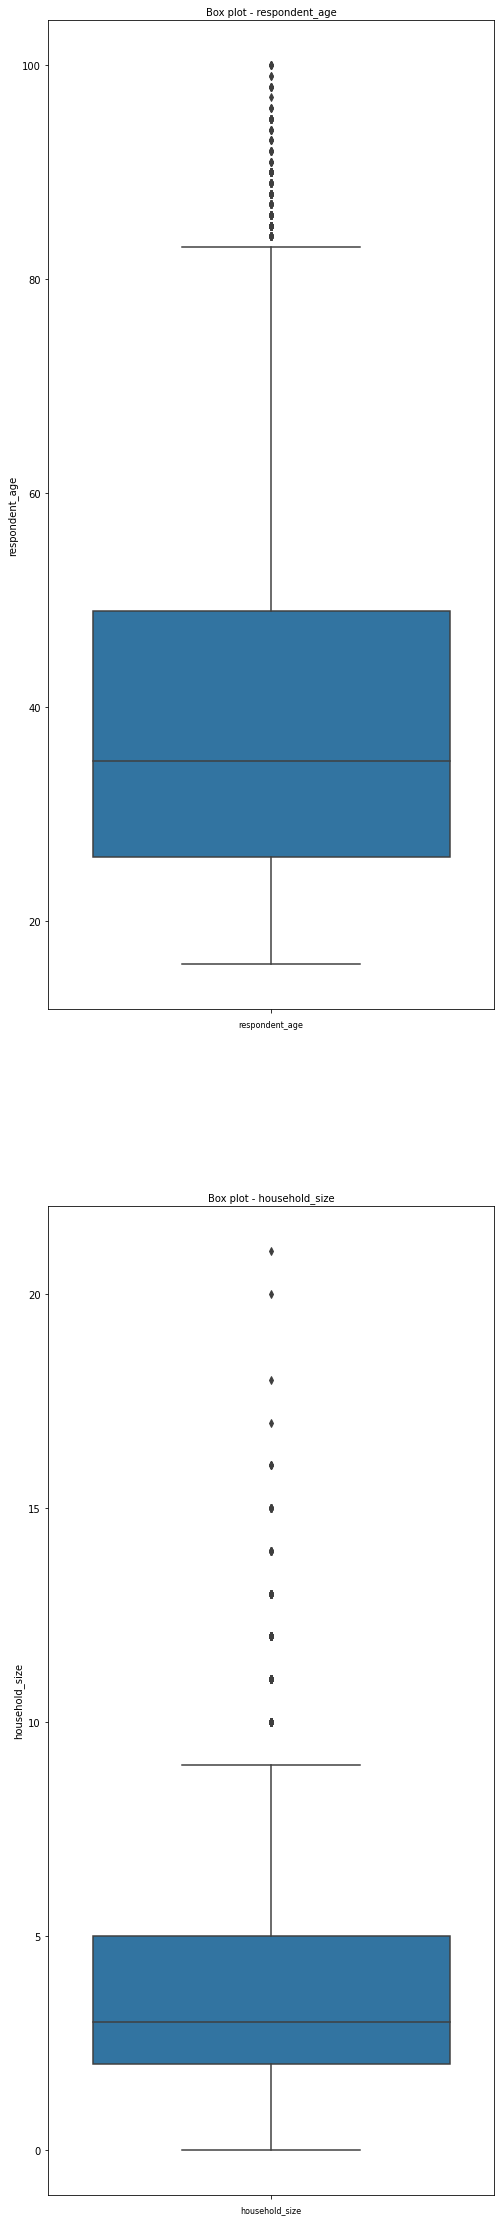

In [ ]:
# lets check for outliers
col_names = [ 'respondent_age', 'household_size']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=clean_FD_DF[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [ ]:
# removing the outliers
Q3 = FD_DF.quantile(0.75)
Q1 = FD_DF.quantile(0.25)
IQR = Q3 - Q1
fin_df = FD_DF[~((FD_DF < (Q1 - 1.5 * IQR)) | (FD_DF > (Q3 + 1.5 * IQR))).any(axis=1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """


In [ ]:
# from the data info we observed that our columns household size and respondent age dtypes are float, thus we change this
clean_FD_DF['household_size'] = clean_FD_DF['household_size'].astype(int)
clean_FD_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23343 non-null  object 
 1   year                    23343 non-null  int64  
 2   uniqueid                23343 non-null  object 
 3   has_a_bank_account      23343 non-null  object 
 4   type_of_location        23343 non-null  object 
 5   cell_phone_access       23343 non-null  object 
 6   household_size          23343 non-null  int64  
 7   respondent_age          23343 non-null  float64
 8   gender_of_respondent    23343 non-null  object 
 9   the_relathip_with_head  23343 non-null  object 
 10  marital_status          23343 non-null  object 
 11  level_of_educuation     23343 non-null  object 
 12  type_of_job             23343 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 2.5+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# we do the same for respondents age
clean_FD_DF['respondent_age'] = clean_FD_DF['respondent_age'].astype(int)
clean_FD_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23343 non-null  object
 1   year                    23343 non-null  int64 
 2   uniqueid                23343 non-null  object
 3   has_a_bank_account      23343 non-null  object
 4   type_of_location        23343 non-null  object
 5   cell_phone_access       23343 non-null  object
 6   household_size          23343 non-null  int64 
 7   respondent_age          23343 non-null  int64 
 8   gender_of_respondent    23343 non-null  object
 9   the_relathip_with_head  23343 non-null  object
 10  marital_status          23343 non-null  object
 11  level_of_educuation     23343 non-null  object
 12  type_of_job             23343 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.5+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# **6. Performance of a Univariate, Bivariate and Multivariate Analysis**

### **a) Univariate Analysis**

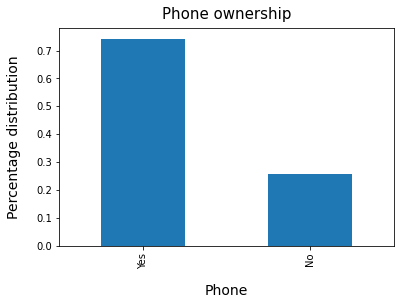

In [ ]:
# internet banking or internet needs a device, in this study the popular device is a phone.
# lets analyze how many people own phones across the study (countries)

(clean_FD_DF['cell_phone_access'].value_counts(normalize=True)).plot.bar()

# labelling the bar chart 
plt.title('Phone ownership', fontsize=15, y=1.015)
# labelling the x axis 
plt.xlabel('Phone', fontsize=14, labelpad=15)
# labelling the y axis
plt.ylabel('Percentage distribution', fontsize=14, labelpad=15)
#display bar chart
plt.show()




**we observe that majority of our resondents had cell phone access.**


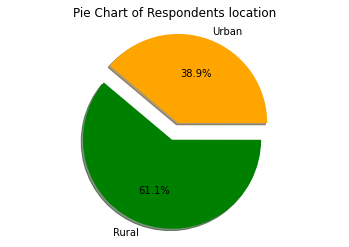

In [ ]:
# lets also visualize where most respondents are located
plt.pie(clean_FD_DF['type_of_location'].value_counts(normalize=True), labels =clean_FD_DF['type_of_location'].value_counts().index,colors = ['Green', 'Orange'], autopct = '%1.1f%%', shadow = True,explode=(0.2,0), startangle = 140)
plt.axis('equal')
plt.title('Pie Chart of Respondents location')
plt.show()

***We observe that 61% of the respondents live in the rural area and 38% live in the urban area***

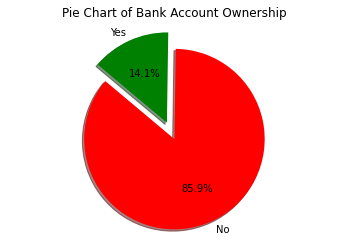

In [ ]:
# lets visualize the % of people with bank accounts
plt.pie(clean_FD_DF['has_a_bank_account'].value_counts(normalize=True), labels =clean_FD_DF['has_a_bank_account'].value_counts().index,colors = ['Red', 'Green'], autopct = '%1.1f%%', shadow = True,explode=(0.2,0), startangle = 140)
plt.axis('equal')
plt.title('Pie Chart of Bank Account Ownership')
plt.show()

***We observe that a WHOOPING 86% of our respondents are unbanked***

**Summary statistics**

In [ ]:
# summary statistics for our age variable
# lets get a brief statistical summary of our data
clean_FD_DF['respondent_age'].describe()

count    23343.000000
mean        38.805509
std         16.519803
min         16.000000
25%         26.000000
50%         35.000000
75%         49.000000
max        100.000000
Name: respondent_age, dtype: float64

In [ ]:
# median
clean_FD_DF['respondent_age'].median()

35.0

In [ ]:
# skewness
clean_FD_DF['respondent_age'].skew()

0.840661747532081

In [ ]:
# sumamry statistics for type of location
# count
clean_FD_DF['type_of_location'].count()

23343

**We observe that our study considers a population of 23,343 people**

In [ ]:
# summary statistics for household size
clean_FD_DF['household_size'].describe()

count    23343.000000
mean         3.688643
std          2.281184
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         21.000000
Name: household_size, dtype: float64

In [ ]:
# mode
clean_FD_DF['household_size'].mode()

0    2
dtype: int64

### b) **Bivariate Analysis**

Text(0.5, 1.0, 'Age and Gender of Bank Account Owners')

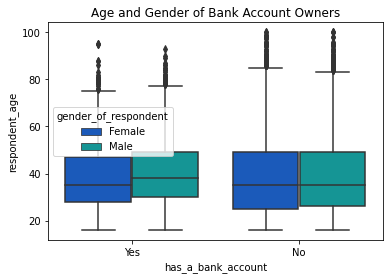

In [ ]:
# lets find out which age group is likely to have a bank account
sns.boxplot(x='has_a_bank_account',y='respondent_age',data=clean_FD_DF, hue = 'gender_of_respondent', palette='winter')
plt.title("Age and Gender of Bank Account Owners")

**We observe from the visual above, that males have more bank accounts than females. We also observe that the age group with the highest number of bank accounts is 50yrs**

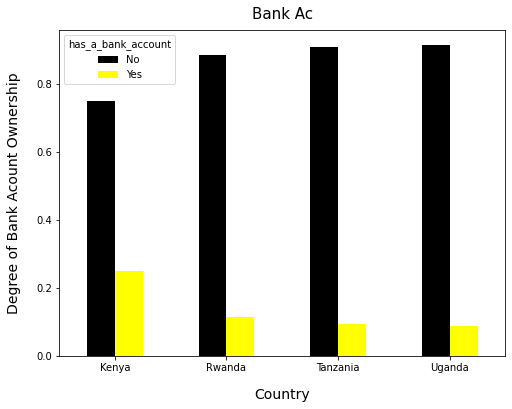

In [ ]:
# 
#Is there a relationship Countries and bank accounts
country=clean_FD_DF.groupby('country')['has_a_bank_account'].value_counts(normalize=True).unstack()

# Specifying the colors of the stacked columns
colors= ['Black', 'Yellow']
# Plotting the chart
country.plot(kind='bar', figsize=(8, 6), color=colors, stacked=False)
# Giving the chart a title
plt.title('Bank Ac', fontsize=15, y=1.015)
# Labelling the x axis
plt.xlabel('Country', fontsize=14, labelpad=15)
# rotating the labels on the x axis
plt.xticks(rotation = 360)
# Labellinbg the y axis
plt.ylabel('Degree of Bank Acount Ownership', fontsize=14, labelpad=15)
# Displaying the chart
plt.show()

### c) **Multivariate Analysis**

**Linear Discriminant Analysis**

# 7) **Challenging the Solution**

In [ ]:
# We have ascertained that the data in our dataset is consistent with the data from other sources. The FinAccess data sets for all 4 counttries in particular has enabled us to ascertain this. 

# 8) **Follow up questions**

a) Did we have the right data? **Yes**

b) Do we need other data to answer our question? **No**


c) Did we answer the right question?
**Yes we did. Through the analysis we will be able to predict the idividuals that are likely to be banked.**